In [25]:
import os
import glob
import pandas as pd
import re

In [26]:
! ls csv

Step-1_Host-02_cwUsed.csv
Step-1_Host-02_DataErrorRate.csv
Step-1_Host-02_HeaderErrorRate.csv
Step-1_Host-02_udpPacketTransmissionInfo.csv
Step-1_Host-04_cwUsed.csv
Step-1_Host-04_DataErrorRate.csv
Step-1_Host-04_HeaderErrorRate.csv
Step-1_Host-04_udpPacketTransmissionInfo.csv
Step-1_Host-06_cwUsed.csv
Step-1_Host-06_DataErrorRate.csv
Step-1_Host-06_HeaderErrorRate.csv
Step-1_Host-06_udpPacketTransmissionInfo.csv
Step-1_Host-08_cwUsed.csv
Step-1_Host-08_DataErrorRate.csv
Step-1_Host-08_HeaderErrorRate.csv
Step-1_Host-08_udpPacketTransmissionInfo.csv
Step-1_Host-10_cwUsed.csv
Step-1_Host-10_DataErrorRate.csv
Step-1_Host-10_HeaderErrorRate.csv
Step-1_Host-10_udpPacketTransmissionInfo.csv
Step-1_Host-12_cwUsed.csv
Step-1_Host-12_DataErrorRate.csv
Step-1_Host-12_HeaderErrorRate.csv
Step-1_Host-12_udpPacketTransmissionInfo.csv
Step-1_Host-14_cwUsed.csv
Step-1_Host-14_DataErrorRate.csv
Step-1_Host-14_HeaderErrorRate.csv
Step-1_Host-14_udpPacketTransmissionInfo.csv
Step-1_Host-16_cwUsed.csv
S

In [27]:
! ls sca/

Step-1_Host-02.sca  Step-1_Host-18.sca	Step-2_6.sca	   Step-4_DCF-4.sca
Step-1_Host-04.sca  Step-1_Host-20.sca	Step-2_7.sca	   Step-4_DCF-5.sca
Step-1_Host-06.sca  Step-2_10.sca	Step-2_8.sca	   Step-4_DCF-6.sca
Step-1_Host-08.sca  Step-2_1.sca	Step-2_9.sca	   Step-4_DCF-7.sca
Step-1_Host-10.sca  Step-2_2.sca	Step-4_DCF-10.sca  Step-4_DCF-8.sca
Step-1_Host-12.sca  Step-2_3.sca	Step-4_DCF-1.sca   Step-4_DCF-9.sca
Step-1_Host-14.sca  Step-2_4.sca	Step-4_DCF-2.sca
Step-1_Host-16.sca  Step-2_5.sca	Step-4_DCF-3.sca


In [28]:
! head -n 10 csv/Step-1_Host-02_*.csv

==> csv/Step-1_Host-02_cwUsed.csv <==
Simulation Time,Node,Contetion Size
0.027133625047,accessPoint,31
0.127133625047,accessPoint,31
0.219154145732,wirelessHost[1],15
0.219192956279,accessPoint,31
0.227133625047,accessPoint,31
0.327133625047,accessPoint,31
0.385820769216,wirelessHost[0],15
0.38585960622,accessPoint,31
0.427133625047,accessPoint,31

==> csv/Step-1_Host-02_DataErrorRate.csv <==
Simulation Time,Node,Data Length,Error rate,SNIR
0.027180435594,wirelessHost[1],464,0,3313.6
0.027180435594,wirelessHost[1],464,0,3313.6
0.027180462051,wirelessHost[0],464,0,3107.43
0.027180462051,wirelessHost[0],464,0,3107.43
0.127180435594,wirelessHost[1],464,0,3313.6
0.127180435594,wirelessHost[1],464,0,3313.6
0.127180462051,wirelessHost[0],464,0,3107.43
0.127180462051,wirelessHost[0],464,0,3107.43
0.219192956279,accessPoint,272,0,3313.6

==> csv/Step-1_Host-02_HeaderErrorRate.csv <==
Simulation Time,Node,Header Length,Error rate,SNIR 
0.027180435594,wirelessHost[1],40,0,3313.6
0.027180435594,

### Only Once

Rename sca files, remove `#` for easy file loading

In [29]:
# ! ls sca/

In [52]:
# # rename all sca to load them in notebook without messy `#` issue
# ! for f in sca/*-#0.sca; do mv "$f" "${f/-#0.sca/.sca}"; done

In [53]:
# check
! ls sca/

Step-1_Host-02.sca  Step-1_Host-18.sca	Step-2_6.sca	   Step-4_DCF-4.sca
Step-1_Host-04.sca  Step-1_Host-20.sca	Step-2_7.sca	   Step-4_DCF-5.sca
Step-1_Host-06.sca  Step-2_10.sca	Step-2_8.sca	   Step-4_DCF-6.sca
Step-1_Host-08.sca  Step-2_1.sca	Step-2_9.sca	   Step-4_DCF-7.sca
Step-1_Host-10.sca  Step-2_2.sca	Step-4_DCF-10.sca  Step-4_DCF-8.sca
Step-1_Host-12.sca  Step-2_3.sca	Step-4_DCF-1.sca   Step-4_DCF-9.sca
Step-1_Host-14.sca  Step-2_4.sca	Step-4_DCF-2.sca
Step-1_Host-16.sca  Step-2_5.sca	Step-4_DCF-3.sca


In [32]:
! head -n 20 sca/Step-1_Host-02.sca

version 2
run Step-1_Host-02-0-20250825-18:10:52-4166
attr configname Step-1_Host-02
attr datetime 20250825-18:10:52
attr experiment Step-1_Host-02
attr inifile omnetpp.ini
attr iterationvars ""
attr iterationvarsf ""
attr measurement ""
attr network WiredAndWirelessHostsWithAP
attr processid 4166
attr repetition 0
attr replication #0
attr resultdir results
attr runnumber 0
attr seedset 210041156
param WiredAndWirelessHostsWithAP.num_wireless 2
param **.*Host[*].app[0].messageLength 1024B
param **.*Host[*].app[0].sendInterval 20ms
param WiredAndWirelessHostsWithAP.num_wireless 0


In [33]:
cw_fl ='csv/Step-1_Host-02_cwUsed.csv'
dataError_fl = 'csv/Step-1_Host-02_DataErrorRate.csv'
hdrError_fl = 'csv/Step-1_Host-02_HeaderErrorRate.csv'
udp_fl ='csv/Step-1_Host-02_udpPacketTransmissionInfo.csv'
sca_fl = 'sca/Step-1_Host-02.sca'

In [34]:
cw_df = pd.read_csv(cw_fl)
dataError_df = pd.read_csv(dataError_fl)
hdrError_df = pd.read_csv(hdrError_fl)
udp_df = pd.read_csv(udp_fl)

# Read scalar file
with open(sca_fl, 'r') as f:
    sca = f.read()

# Show the shape of each DataFrame as confirmation
print('cw_df:', cw_df.shape)
print('dataError_df:', dataError_df.shape)
print('hdrError_df:', hdrError_df.shape)
print('udp_df:', udp_df.shape)
# get sca lines
print('sca:', (len(sca.split('\n'))))

cw_df: (8242, 3)
dataError_df: (67638, 5)
hdrError_df: (67638, 5)
udp_df: (3998, 5)
sca: 3663


In [35]:
cw_df.head()

,Simulation Time,Node,Contetion Size
0,0.027134,accessPoint,31
1,0.127134,accessPoint,31
2,0.219154,wirelessHost[1],15
3,0.219193,accessPoint,31
4,0.227134,accessPoint,31


In [36]:
dataError_df.head()

,Simulation Time,Node,Data Length,Error rate,SNIR
0,0.02718,wirelessHost[1],464,0,3313.60
1,0.02718,wirelessHost[1],464,0,3313.60
2,0.02718,wirelessHost[0],464,0,3107.43
3,0.02718,wirelessHost[0],464,0,3107.43
4,0.12718,wirelessHost[1],464,0,3313.60


In [37]:
hdrError_df.head()

,Simulation Time,Node,Header Length,Error rate,SNIR
0,0.02718,wirelessHost[1],40,0.0,3313.60
1,0.02718,wirelessHost[1],40,0.0,3313.60
2,0.02718,wirelessHost[0],40,0.0,3107.43
3,0.02718,wirelessHost[0],40,0.0,3107.43
4,0.12718,wirelessHost[1],40,0.0,3313.60


In [38]:
udp_df.head()

,Simulation Time,Sender,Receiver,Packet ID,Delay
0,1.029298,10.0.0.1,10.0.0.4 (sinkNode),1114,1.009298
1,1.034461,10.0.0.1,10.0.0.4 (sinkNode),1179,0.994461
2,1.039505,10.0.0.1,10.0.0.4 (sinkNode),1244,0.979505
3,1.044488,10.0.0.1,10.0.0.4 (sinkNode),1311,0.964488
4,1.050285,10.0.0.1,10.0.0.4 (sinkNode),1406,0.950285


In [39]:
# 1 Packet Delivery Ratio (PDR) - CORRECTED WITH CSV EXTRACTION
# PDR = packets received by sink / total packets sent by all nodes

# Packets received by sink
num_packets_received = udp_df.shape[0]

# unique senders and their packet counts from CSV
# unique_senders = udp_df['Sender'].unique()
# num_hosts = len(unique_senders)


# total hosts from sca
total_hosts = int(re.search(r'Host-(\d+)', udp_fl).group(1))
print(total_hosts)

# Extract packets per host from SCA file
packets_per_host = int(re.search(r'scalar WiredAndWirelessHostsWithAP\.wirelessHost\[0\]\.app\[0\] "packets sent" (\d+)', sca).group(1))
print(packets_per_host)

total_packets_sent = packets_per_host * total_hosts

# Calculate PDR
PDR = (num_packets_received / total_packets_sent) * 100

print(f"Packets received by sink: {num_packets_received}")
print(f"Number of unique senders in CSV: {total_hosts}")
print(f"Total packets sent: {total_packets_sent}")
print(f"PDR: {PDR}%")

2
2000
Packets received by sink: 3998
Number of unique senders in CSV: 2
Total packets sent: 4000
PDR: 99.95%


In [40]:
simulation_time = 40 # hard coded as fixed

In [41]:
# 2 Throughput (bps)
# Throughput = sum of sink node packet received bytes / simulation runtime

# Get actual bytes received at sink in udp layer from SCA file
sink_bytes_received = int(re.search(r'scalar WiredAndWirelessHostsWithAP\.sinkNode\.udp packetReceived:sum\(packetBytes\) (\d+)', sca).group(1))

# Calculate throughput in bps
throughput_bps = (sink_bytes_received * 8) / simulation_time

print(f"Sink bytes received (from SCA): {sink_bytes_received}")
print(f"Throughput: {throughput_bps} bps")

Sink bytes received (from SCA): 4125936
Throughput: 825187.2 bps


In [42]:
# 3 MAC-layer Retransmissions Rate
# we are using contention window increase to determine
cw_df = cw_df.sort_values(['Node', 'Simulation Time'])
retransmissions = 0
total_transmissions = 0
for node, group in cw_df.groupby('Node'):
    cw = group['Contetion Size'].to_numpy()
    retrans = (cw[1:] > cw[:-1]).sum()
    retransmissions += retrans
    total_transmissions += len(cw)
print(f"Estimated MAC-layer retransmissions (CW increases, all nodes): {retransmissions}")
if total_transmissions > 0:
    retrans_rate = retransmissions / total_transmissions
    print(f"Estimated MAC-layer retransmission rate (all nodes): {retrans_rate}%")
else:
    print("No transmissions found to estimate retransmission rate.")

Estimated MAC-layer retransmissions (CW increases, all nodes): 3820
Estimated MAC-layer retransmission rate (all nodes): 0.46347973792768743%


In [43]:
# 4 Bit Error Rate
# Calculate BER using weighted header and data error rates and lengths

h_len = hdrError_df['Header Length']
d_len = dataError_df['Data Length']
BER_h = hdrError_df['Error rate']
BER_d = dataError_df['Error rate']
BER_packet = (BER_h * h_len + BER_d * d_len) / (h_len + d_len)
overall_ber = BER_packet.mean()

print(f"Weighted per-packet BER: {overall_ber:.6e}")

Weighted per-packet BER: 2.301551e-02


In [44]:
# 5 End-to-End Delay
# Use udpPacketTransmissionInfo.csv: 'Delay' column
if 'Delay' in udp_df.columns:
    delay_min = udp_df['Delay'].min()
    delay_max = udp_df['Delay'].max()
    delay_avg = udp_df['Delay'].mean()
    print(f"End-to-End Delay (min): {delay_min:.6f} s")
    print(f"End-to-End Delay (max): {delay_max:.6f} s")
    print(f"End-to-End Delay (avg): {delay_avg:.6f} s")
else:
    print("End-to-End Delay: 'Delay' column not found.")

End-to-End Delay (min): 0.004787 s
End-to-End Delay (max): 1.041241 s
End-to-End Delay (avg): 0.039658 s


### Functionalize

In [45]:
csv_root = 'csv'
sca_root = 'sca'

In [60]:
def get_metrics(cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path, runtime=40):

    # Load CSV files into DataFrames
    cw_df = pd.read_csv(cw_path)
    dataError_df = pd.read_csv(dataerr_path)
    hdrError_df = pd.read_csv(headererr_path)
    udp_df = pd.read_csv(udpinfo_path)

    # Read scalar file
    with open(scalar_path, 'r') as f:
        sca = f.read()

    # 1. Number of Devices
    total_hosts = int(re.search(r'Host-(\d+)', udpinfo_path).group(1))

    # 2. Packet Delivery Ratio (PDR)
    num_packets_received = udp_df.shape[0]
    packets_per_host_pattern = r'scalar WiredAndWirelessHostsWithAP\.wirelessHost\[0\]\.app\[0\] "packets sent" (\d+)'
    packets_per_host = int(re.search(packets_per_host_pattern, sca).group(1))
    total_packets_sent = packets_per_host * total_hosts
    PDR = (num_packets_received / total_packets_sent) * 100

    # 3. Throughput (bps)
    sink_bytes_pattern = r'scalar WiredAndWirelessHostsWithAP\.sinkNode\.udp packetReceived:sum\(packetBytes\) (\d+)'
    sink_bytes_received = int(re.search(sink_bytes_pattern, sca).group(1))
    throughput_bps = (sink_bytes_received * 8) / runtime

    # 4. MAC-layer Retransmission Rate
    cw_df = cw_df.sort_values(['Node', 'Simulation Time'])
    retransmissions = 0
    total_transmissions = 0
    for node, group in cw_df.groupby('Node'):
        cw = group['Contetion Size'].to_numpy()
        retrans = (cw[1:] > cw[:-1]).sum()
        retransmissions += retrans
        total_transmissions += len(cw)
    retrans_rate = (retransmissions / total_transmissions) * 100 if total_transmissions > 0 else 0

    # 5. Bit Error Rate (BER)
    h_len = hdrError_df['Header Length']
    d_len = dataError_df['Data Length']
    BER_h = hdrError_df['Error rate']
    BER_d = dataError_df['Error rate']
    BER_packet = (BER_h * h_len + BER_d * d_len) / (h_len + d_len)
    overall_ber = BER_packet.mean()

    # 6. End-to-End Delay
    delay_min = udp_df['Delay'].min()
    delay_max = udp_df['Delay'].max()
    delay_avg = udp_df['Delay'].mean()

    # 7. Msg Length, Send Interval
    message_length_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.messageLength\s+(\d+)([a-zA-Z]*)'
    send_interval_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.sendInterval\s+([\d\.]+)([a-zA-Z]*)'

    message_length_match = re.search(message_length_pattern, sca)
    send_interval_match = re.search(send_interval_pattern, sca)

    # Extract and format the results
    message_length = f"{message_length_match.group(1)}{message_length_match.group(2)}"
    send_interval = f"{send_interval_match.group(1)}{send_interval_match.group(2)}"

    # Return metrics rounded to 2 decimal places
    return {
        "Num Devices": total_hosts,
        "PDR (%)": round(PDR, 2),
        "Throughput (bps)": round(throughput_bps, 2),
        "MAC Retransmission Rate (%)": round(retrans_rate, 2),
        "BER (%)": round(overall_ber * 100, 2),
        "End-to-End Delay (Max)": round(delay_max, 6) if delay_max is not None else None,
        "End-to-End Delay (Min)": round(delay_min, 6) if delay_min is not None else None,
        "End-to-End Delay (Avg)": round(delay_avg, 6) if delay_avg is not None else None,
        "Message Length": message_length,
        "Send Interval": send_interval
    }

In [68]:
# Define start, end, and jump
start = 2
end = 20
jump = 2

# Initialize an empty list to store metrics
metrics_list = []

# Loop through the range and call the function for each host
for i in range(start, end + 1, jump):
    # Zero-pad the host number to two digits
    host_number = f"{i:02d}"
    
    cw_path = f'csv/Step-1_Host-{host_number}_cwUsed.csv'
    dataerr_path = f'csv/Step-1_Host-{host_number}_DataErrorRate.csv'
    headererr_path = f'csv/Step-1_Host-{host_number}_HeaderErrorRate.csv'
    udpinfo_path = f'csv/Step-1_Host-{host_number}_udpPacketTransmissionInfo.csv'
    scalar_path = f'sca/Step-1_Host-{host_number}.sca'

    # Check if all files exist
    if not all(os.path.exists(path) for path in [cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path]):
        print(f"Skipping Host-{host_number}: One or more files are missing.")
        continue

    # Call the function and append the results to the list
    metrics = get_metrics(cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path)
    metrics_list.append(metrics)

# Convert the list of metrics into a DataFrame573387.2	
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
metrics_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval
0,2,99.95,825187.2,46.35,2.30,1.041241,0.004787,0.039658,100B,1s
1,4,94.84,1565956.8,20.61,0.97,3.298450,0.004720,1.190798,100B,1s
2,6,63.52,1573387.2,27.49,1.53,6.887172,0.969538,2.888359,100B,1s
3,8,47.59,1571736.0,31.78,1.84,7.796824,0.709108,3.857061,100B,1s
4,10,38.02,1569259.2,34.96,2.20,9.833194,0.972089,4.752385,100B,1s
5,12,31.60,1565544.0,37.30,2.35,13.058214,0.957355,5.630027,100B,1s
6,14,27.06,1563686.4,39.41,2.51,15.022148,0.858248,6.500545,100B,1s
7,16,23.61,1559145.6,41.48,2.53,16.720702,0.921869,7.323058,100B,1s
8,18,20.94,1556256.0,42.73,2.72,23.858557,0.925816,8.095679,100B,1s
9,20,18.83,1555017.6,43.93,2.88,23.325527,0.922517,8.876411,100B,1s


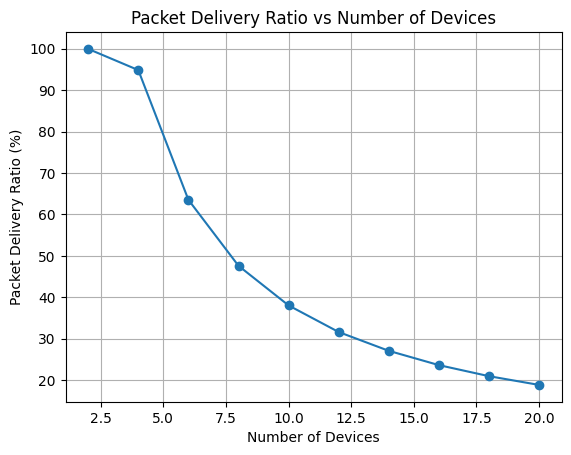

In [61]:
import matplotlib.pyplot as plt

plt.plot(metrics_df['Num Devices'], metrics_df['PDR (%)'], marker='o')
plt.title('Packet Delivery Ratio vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('Packet Delivery Ratio (%)')
plt.grid()
plt.show()

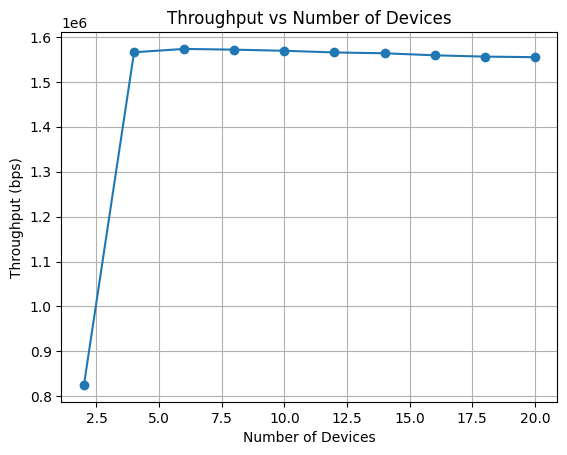

In [63]:
import matplotlib.pyplot as plt

plt.plot(metrics_df['Num Devices'], metrics_df['Throughput (bps)'], marker='o')
plt.title('Throughput vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('Throughput (bps)')
plt.grid()
plt.show()

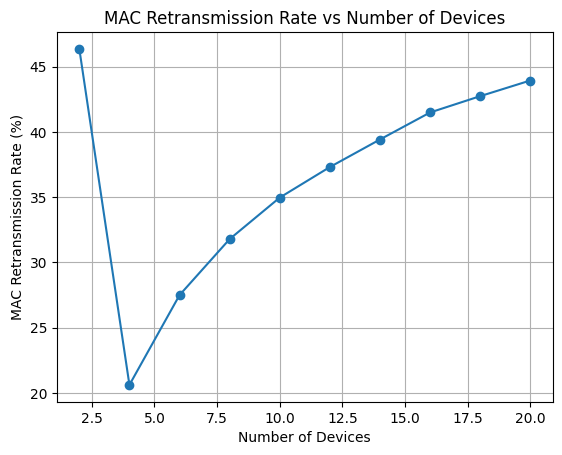

In [64]:
import matplotlib.pyplot as plt

plt.plot(metrics_df['Num Devices'], metrics_df['MAC Retransmission Rate (%)'], marker='o')
plt.title('MAC Retransmission Rate vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('MAC Retransmission Rate (%)')
plt.grid()
plt.show()

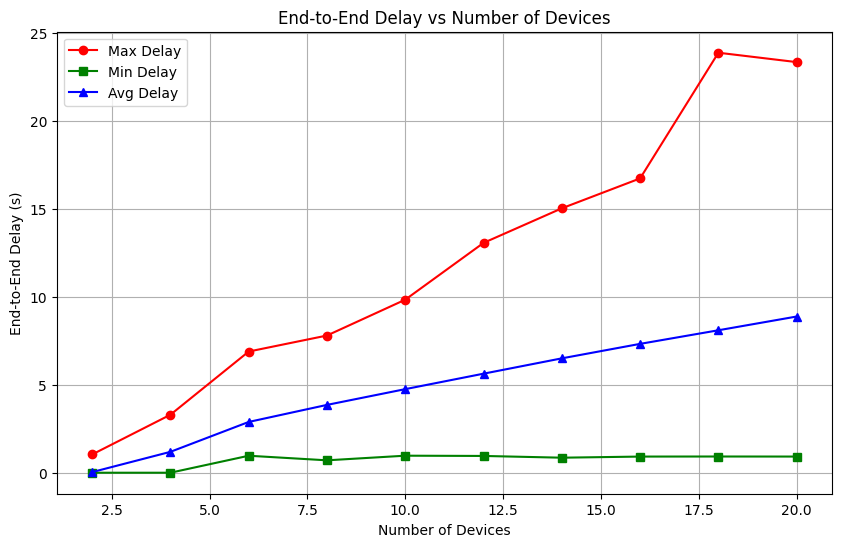

In [67]:
import matplotlib.pyplot as plt

# Plot all end-to-end delay metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Max)'], marker='o', color='r', label='Max Delay')
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Min)'], marker='s', color='g', label='Min Delay')
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Avg)'], marker='^', color='b', label='Avg Delay')
plt.title('End-to-End Delay vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('End-to-End Delay (s)')
plt.grid()
plt.legend()
plt.show()

In [50]:
metrics_df.to_csv("output/output-1.csv", index=False)

In [57]:
# 7. Extract additional information from scalar file
# Corrected regex patterns for the parameters
message_length_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.messageLength\s+(\d+)([a-zA-Z]*)'
send_interval_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.sendInterval\s+([\d\.]+)([a-zA-Z]*)'

# Extract values using regex
message_length_match = re.search(message_length_pattern, sca)
send_interval_match = re.search(send_interval_pattern, sca)

# Extract and format the results
message_length = f"{message_length_match.group(1)}{message_length_match.group(2)}" if message_length_match else None
send_interval = f"{send_interval_match.group(1)}{send_interval_match.group(2)}" if send_interval_match else None

print("Message Length:", message_length)
print("Send Interval:", send_interval)

Message Length: 100B
Send Interval: 1s
